In [15]:
# This notebook is used to test double_dot scripts
%reset
import imp
import dd
import sys
sys.path.append('/Users/ssk4/quantum-ml/nanowire_model')
import physics
import potential_profile
import markov
import exceptions
import thomas_fermi
imp.reload(physics)
imp.reload(potential_profile)
imp.reload(markov)
imp.reload(exceptions)
imp.reload(thomas_fermi)

imp.reload(dd)

print(dd.calculate_2d_map())



Once deleted, variables cannot be recovered. Proceed (y/[n])? y
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
55.09910011291504


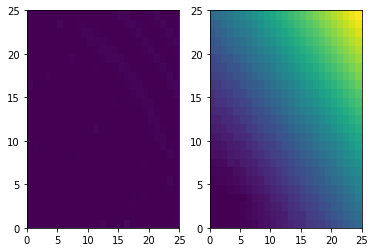

In [19]:
import numpy as np
dat = np.load('/Users/ssk4/data/double_dot_test1.npy').item()

import matplotlib.pyplot as plt
%matplotlib inline

curr_map = np.array([x['current'] for x in dat['output']]).reshape((len(dat['input']['V_d1_vec']),len(dat['input']['V_d2_vec'])))

XX,YY = np.meshgrid(dat['input']['V_d1_vec'],dat['input']['V_d2_vec'])
plt.subplot(1,2,1)

plt.pcolor(curr_map,vmax=1e-3)
plt.subplot(1,2,2)
charge_map = np.array([np.sum(x['charge_state']) for x in dat['output']]).reshape((len(dat['input']['V_d1_vec']),
                                                                                   len(dat['input']['V_d2_vec'])))

XX,YY = np.meshgrid(dat['input']['V_d1_vec'],dat['input']['V_d2_vec'])
plt.pcolor(charge_map)

In [101]:
# This notebook is used to test double_dot 3d scripts
%reset
import imp
import dd
import sys
sys.path.append('/Users/ssk4/quantum-ml/nanowire_model')
import physics
import potential_profile
import markov
import exceptions
import thomas_fermi
imp.reload(physics)
imp.reload(potential_profile)
imp.reload(markov)
imp.reload(exceptions)
imp.reload(thomas_fermi)

imp.reload(dd)

print(dd.calculate_3d_map())

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
0
1
2
3
4
5
6
7
8
9
461.1974320411682


In [102]:
import numpy as np
dat = np.load('/Users/ssk4/data/double_dot_3d50_grid_2017-07-08 16:55:25.542132.npy').item()

import matplotlib.pyplot as plt
%matplotlib inline

curr_map = np.array([x['current'] for x in dat['output']]).reshape((len(dat['input']['V_b2_vec']),
                                                                    len(dat['input']['V_b1_vec']),
                                                                    len(dat['input']['V_b3_vec'])))


In [64]:
cc = np.zeros((50,50,50))
for i in range(50):
    for j in range(50):
        for k in range(50):
            cc[k,i,j] = curr_map[j,i,k]
            
            

In [113]:
plt.pcolor(curr_map[10],vmax=1e-6)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [85]:
dat['output'][100]

{'charge_state': (),
 'current': 1.0861971650001733e-28,
 'edges': [((0, 1),
   (1, 0),
   {'battery_edge': True, 'weight': 5930969606400161.0}),
  ((1, 0), (0, 1), {'battery_edge': False, 'weight': 1.3851694344244335e-08})],
 'nodes': [((0, 1), {'battery_node': True}), ((1, 0), {})],
 'num_dot': 0,
 'prob_dist': matrix([[  1.08619717e-28],
         [  1.00000000e+00]]),
 'state': 'QPC'}